In [56]:
!pip install -q -U tensorflow>=1.8.0
!pip install tabulate
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import time
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


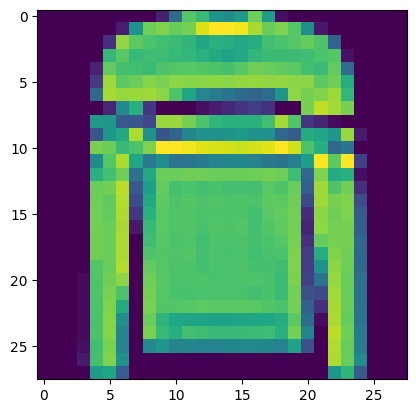

In [57]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization

In [58]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets

In [59]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Architecture Comparision

### Different combination of number of filters

Model 1 [(32,2),(64,2), (0.3,0.3)]

In [60]:
model_01 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_01.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_01.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_01.add(tf.keras.layers.Dropout(0.3))

model_01.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_01.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_01.add(tf.keras.layers.Dropout(0.3))

model_01.add(tf.keras.layers.Flatten())
model_01.add(tf.keras.layers.Dense(256, activation='relu'))
model_01.add(tf.keras.layers.Dropout(0.5))
model_01.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 2 [(128,2),(64,2), (0.3,0.3)]

In [61]:
model_02 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_02.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_02.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_02.add(tf.keras.layers.Dropout(0.3))

model_02.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_02.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_02.add(tf.keras.layers.Dropout(0.3))

model_02.add(tf.keras.layers.Flatten())
model_02.add(tf.keras.layers.Dense(256, activation='relu'))
model_02.add(tf.keras.layers.Dropout(0.5))
model_02.add(tf.keras.layers.Dense(10, activation='softmax'))

### Different combinations of kernels

Model 3 [(64,4),(32,4), (0.3,0.3)]

In [62]:
model_03 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_03.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding='same', activation='relu', input_shape=(28,28,1))) 
model_03.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_03.add(tf.keras.layers.Dropout(0.3))

model_03.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_03.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_03.add(tf.keras.layers.Dropout(0.3))

model_03.add(tf.keras.layers.Flatten())
model_03.add(tf.keras.layers.Dense(256, activation='relu'))
model_03.add(tf.keras.layers.Dropout(0.5))
model_03.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 4 [(64,2),(32,4), (0.3,0.3)]

In [63]:
model_04 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_04.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_04.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_04.add(tf.keras.layers.Dropout(0.3))

model_04.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_04.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_04.add(tf.keras.layers.Dropout(0.3))

model_04.add(tf.keras.layers.Flatten())
model_04.add(tf.keras.layers.Dense(256, activation='relu'))
model_04.add(tf.keras.layers.Dropout(0.5))
model_04.add(tf.keras.layers.Dense(10, activation='softmax'))

### Different combinations of kernels

Model 5 [(64,2),(32,2), (0.2,0.2)]

In [64]:
model_05 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_05.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_05.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_05.add(tf.keras.layers.Dropout(0.2))

model_05.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_05.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model_05.add(tf.keras.layers.Dropout(0.2))

model_05.add(tf.keras.layers.Flatten())
model_05.add(tf.keras.layers.Dense(256, activation='relu'))
model_05.add(tf.keras.layers.Dropout(0.5))
model_05.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 6 [(64,2),(32,2), (0.4,0.4)]

In [65]:
model_06 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_06.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_06.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_06.add(tf.keras.layers.Dropout(0.4))

model_06.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_06.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_06.add(tf.keras.layers.Dropout(0.4))

model_06.add(tf.keras.layers.Flatten())
model_06.add(tf.keras.layers.Dense(256, activation='relu'))
model_06.add(tf.keras.layers.Dropout(0.5))
model_06.add(tf.keras.layers.Dense(10, activation='softmax'))

### Architecture with more layers

Model 7 [(64,2),(32,2), (32,2),(0.3,0.3,0.3)]

In [66]:
model_07 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_07.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.3))

model_07.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.3))

model_07.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.3))

model_07.add(tf.keras.layers.Flatten())
model_07.add(tf.keras.layers.Dense(256, activation='relu'))
model_07.add(tf.keras.layers.Dropout(0.6))
model_07.add(tf.keras.layers.Dense(10, activation='softmax'))

### Architectures combined changes

Model 8 [(128,2),(64,2),(64,2), (0.3,0.3,0.3)]

In [67]:
model_08 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_08.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Flatten())
model_08.add(tf.keras.layers.Dense(256, activation='relu'))
model_08.add(tf.keras.layers.Dropout(0.5))
model_08.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 9 [(128,2),(64,2), (0.2,0.2)]

In [68]:
model_09 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_09.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_09.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_09.add(tf.keras.layers.Dropout(0.2))

model_09.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_09.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_09.add(tf.keras.layers.Dropout(0.2))

model_09.add(tf.keras.layers.Flatten())
model_09.add(tf.keras.layers.Dense(256, activation='relu'))
model_09.add(tf.keras.layers.Dropout(0.5))
model_09.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 10 [(128,4),(64,4), (0.3,0.3)]

In [69]:
model_10 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_10.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_10.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_10.add(tf.keras.layers.Dropout(0.3))

model_10.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_10.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_10.add(tf.keras.layers.Dropout(0.3))

model_10.add(tf.keras.layers.Flatten())
model_10.add(tf.keras.layers.Dense(256, activation='relu'))
model_10.add(tf.keras.layers.Dropout(0.5))
model_10.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compile the models

In [70]:
model_01.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_02.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_03.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_04.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_05.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_06.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_07.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_08.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_09.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model_10.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the models

In [71]:
checkpointer_01 = ModelCheckpoint(filepath='model_01.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_02 = ModelCheckpoint(filepath='model_02.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_03 = ModelCheckpoint(filepath='model_03.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_04 = ModelCheckpoint(filepath='model_04.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_05 = ModelCheckpoint(filepath='model_05.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_06 = ModelCheckpoint(filepath='model_06.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_07 = ModelCheckpoint(filepath='model_07.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_08 = ModelCheckpoint(filepath='model_08.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_09 = ModelCheckpoint(filepath='model_09.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_10 = ModelCheckpoint(filepath='model_10.weights.best.hdf5', verbose = 1, save_best_only=True)

In [72]:
# Mark start time
start = time.time()
model_01.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_01])
# Calculate training time
time_01 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5860 - accuracy: 0.7856
Epoch 1: val_loss improved from inf to 0.37104, saving model to model_01.weights.best.hdf5
860/860 [==============================] - 27s 30ms/step - loss: 0.5860 - accuracy: 0.7856 - val_loss: 0.3710 - val_accuracy: 0.8710
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4094 - accuracy: 0.8523
Epoch 2: val_loss improved from 0.37104 to 0.32080, saving model to model_01.weights.best.hdf5
860/860 [==============================] - 25s 29ms/step - loss: 0.4096 - accuracy: 0.8523 - val_loss: 0.3208 - val_accuracy: 0.8860
Epoch 3/10
858/860 [============================>.] - ETA: 0s - loss: 0.3645 - accuracy: 0.8669
Epoch 3: val_loss improved from 0.32080 to 0.28825, saving model to model_01.weights.best.hdf5
860/860 [==============================] - 27s 31ms/step - loss: 0.3646 - accuracy: 0.8669 - val_loss: 0.2882 - val_accuracy: 0.8974
Epoch 4/10
859/860 [============

In [73]:
# Mark start time
start = time.time()
model_02.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_02])
# Calculate training time
time_02 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5642 - accuracy: 0.7940
Epoch 1: val_loss improved from inf to 0.36245, saving model to model_02.weights.best.hdf5
860/860 [==============================] - 56s 64ms/step - loss: 0.5641 - accuracy: 0.7941 - val_loss: 0.3624 - val_accuracy: 0.8702
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3845 - accuracy: 0.8610
Epoch 2: val_loss improved from 0.36245 to 0.31309, saving model to model_02.weights.best.hdf5
860/860 [==============================] - 58s 67ms/step - loss: 0.3845 - accuracy: 0.8610 - val_loss: 0.3131 - val_accuracy: 0.8856
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3385 - accuracy: 0.8776
Epoch 3: val_loss improved from 0.31309 to 0.27249, saving model to model_02.weights.best.hdf5
860/860 [==============================] - 57s 67ms/step - loss: 0.3385 - accuracy: 0.8776 - val_loss: 0.2725 - val_accuracy: 0.9004
Epoch 4/10
859/860 [============

In [74]:
# Mark start time
start = time.time()
model_03.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_03])
# Calculate training time
time_03 = time.time() - start

Epoch 1/10
858/860 [============================>.] - ETA: 0s - loss: 0.9074 - accuracy: 0.6626
Epoch 1: val_loss improved from inf to 0.49375, saving model to model_03.weights.best.hdf5
860/860 [==============================] - 22s 25ms/step - loss: 0.9069 - accuracy: 0.6628 - val_loss: 0.4938 - val_accuracy: 0.8224
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.6011 - accuracy: 0.7811
Epoch 2: val_loss improved from 0.49375 to 0.42000, saving model to model_03.weights.best.hdf5
860/860 [==============================] - 23s 27ms/step - loss: 0.6011 - accuracy: 0.7811 - val_loss: 0.4200 - val_accuracy: 0.8524
Epoch 3/10
858/860 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.8057
Epoch 3: val_loss improved from 0.42000 to 0.39019, saving model to model_03.weights.best.hdf5
860/860 [==============================] - 21s 24ms/step - loss: 0.5347 - accuracy: 0.8056 - val_loss: 0.3902 - val_accuracy: 0.8610
Epoch 4/10
858/860 [============

In [75]:
# Mark start time
start = time.time()
model_04.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_04])
# Calculate training time
time_04 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.7271 - accuracy: 0.7341
Epoch 1: val_loss improved from inf to 0.39736, saving model to model_04.weights.best.hdf5
860/860 [==============================] - 48s 55ms/step - loss: 0.7270 - accuracy: 0.7342 - val_loss: 0.3974 - val_accuracy: 0.8568
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.8300
Epoch 2: val_loss improved from 0.39736 to 0.33652, saving model to model_04.weights.best.hdf5
860/860 [==============================] - 41s 48ms/step - loss: 0.4647 - accuracy: 0.8301 - val_loss: 0.3365 - val_accuracy: 0.8790
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.4088 - accuracy: 0.8484
Epoch 3: val_loss improved from 0.33652 to 0.31000, saving model to model_04.weights.best.hdf5
860/860 [==============================] - 40s 47ms/step - loss: 0.4087 - accuracy: 0.8484 - val_loss: 0.3100 - val_accuracy: 0.8876
Epoch 4/10
859/860 [============

In [76]:
# Mark start time
start = time.time()
model_05.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_05])
# Calculate training time
time_05 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6599 - accuracy: 0.7561
Epoch 1: val_loss improved from inf to 0.39211, saving model to model_05.weights.best.hdf5
860/860 [==============================] - 31s 35ms/step - loss: 0.6598 - accuracy: 0.7561 - val_loss: 0.3921 - val_accuracy: 0.8606
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.8408
Epoch 2: val_loss improved from 0.39211 to 0.32577, saving model to model_05.weights.best.hdf5
860/860 [==============================] - 35s 40ms/step - loss: 0.4302 - accuracy: 0.8409 - val_loss: 0.3258 - val_accuracy: 0.8820
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.8607
Epoch 3: val_loss improved from 0.32577 to 0.30460, saving model to model_05.weights.best.hdf5
860/860 [==============================] - 34s 40ms/step - loss: 0.3805 - accuracy: 0.8607 - val_loss: 0.3046 - val_accuracy: 0.8878
Epoch 4/10
860/860 [============

In [77]:
# Mark start time
start = time.time()
model_06.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_06])
# Calculate training time
time_06 = time.time() - start

Epoch 1/10
858/860 [============================>.] - ETA: 0s - loss: 0.6467 - accuracy: 0.7567
Epoch 1: val_loss improved from inf to 0.39150, saving model to model_06.weights.best.hdf5
860/860 [==============================] - 28s 32ms/step - loss: 0.6465 - accuracy: 0.7568 - val_loss: 0.3915 - val_accuracy: 0.8586
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4447 - accuracy: 0.8381
Epoch 2: val_loss improved from 0.39150 to 0.34244, saving model to model_06.weights.best.hdf5
860/860 [==============================] - 28s 33ms/step - loss: 0.4446 - accuracy: 0.8381 - val_loss: 0.3424 - val_accuracy: 0.8830
Epoch 3/10
858/860 [============================>.] - ETA: 0s - loss: 0.3972 - accuracy: 0.8535
Epoch 3: val_loss improved from 0.34244 to 0.30781, saving model to model_06.weights.best.hdf5
860/860 [==============================] - 30s 35ms/step - loss: 0.3972 - accuracy: 0.8535 - val_loss: 0.3078 - val_accuracy: 0.8910
Epoch 4/10
859/860 [============

In [78]:
# Mark start time
start = time.time()
model_07.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_07])
# Calculate training time
time_07 = time.time() - start

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.8965 - accuracy: 0.6579
Epoch 1: val_loss improved from inf to 0.51818, saving model to model_07.weights.best.hdf5
860/860 [==============================] - 33s 38ms/step - loss: 0.8965 - accuracy: 0.6579 - val_loss: 0.5182 - val_accuracy: 0.8022
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.7741
Epoch 2: val_loss improved from 0.51818 to 0.43122, saving model to model_07.weights.best.hdf5
860/860 [==============================] - 31s 36ms/step - loss: 0.5902 - accuracy: 0.7741 - val_loss: 0.4312 - val_accuracy: 0.8418
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.5217 - accuracy: 0.8047
Epoch 3: val_loss improved from 0.43122 to 0.37482, saving model to model_07.weights.best.hdf5
860/860 [==============================] - 27s 32ms/step - loss: 0.5216 - accuracy: 0.8047 - val_loss: 0.3748 - val_accuracy: 0.8636
Epoch 4/10
859/860 [============

In [79]:
# Mark start time
start = time.time()
model_08.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_08])
# Calculate training time
time_08 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.7413 - accuracy: 0.7211
Epoch 1: val_loss improved from inf to 0.40814, saving model to model_08.weights.best.hdf5
860/860 [==============================] - 57s 65ms/step - loss: 0.7410 - accuracy: 0.7212 - val_loss: 0.4081 - val_accuracy: 0.8558
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.8268
Epoch 2: val_loss improved from 0.40814 to 0.33193, saving model to model_08.weights.best.hdf5
860/860 [==============================] - 56s 65ms/step - loss: 0.4648 - accuracy: 0.8268 - val_loss: 0.3319 - val_accuracy: 0.8818
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.4044 - accuracy: 0.8521
Epoch 3: val_loss improved from 0.33193 to 0.31127, saving model to model_08.weights.best.hdf5
860/860 [==============================] - 57s 66ms/step - loss: 0.4045 - accuracy: 0.8521 - val_loss: 0.3113 - val_accuracy: 0.8864
Epoch 4/10
859/860 [============

In [80]:
# Mark start time
start = time.time()
model_09.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_09])
# Calculate training time
time_09 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5822 - accuracy: 0.7855
Epoch 1: val_loss improved from inf to 0.36438, saving model to model_09.weights.best.hdf5
860/860 [==============================] - 29s 33ms/step - loss: 0.5821 - accuracy: 0.7856 - val_loss: 0.3644 - val_accuracy: 0.8712
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8563
Epoch 2: val_loss improved from 0.36438 to 0.31430, saving model to model_09.weights.best.hdf5
860/860 [==============================] - 28s 33ms/step - loss: 0.3977 - accuracy: 0.8563 - val_loss: 0.3143 - val_accuracy: 0.8854
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3533 - accuracy: 0.8716
Epoch 3: val_loss improved from 0.31430 to 0.29334, saving model to model_09.weights.best.hdf5
860/860 [==============================] - 28s 33ms/step - loss: 0.3532 - accuracy: 0.8717 - val_loss: 0.2933 - val_accuracy: 0.8902
Epoch 4/10
859/860 [============

In [81]:
# Mark start time
start = time.time()
model_10.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_10])
# Calculate training time
time_10 = time.time() - start

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6088 - accuracy: 0.7752
Epoch 1: val_loss improved from inf to 0.38893, saving model to model_10.weights.best.hdf5
860/860 [==============================] - 29s 33ms/step - loss: 0.6086 - accuracy: 0.7752 - val_loss: 0.3889 - val_accuracy: 0.8628
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8448
Epoch 2: val_loss improved from 0.38893 to 0.32897, saving model to model_10.weights.best.hdf5
860/860 [==============================] - 28s 33ms/step - loss: 0.4227 - accuracy: 0.8448 - val_loss: 0.3290 - val_accuracy: 0.8842
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3768 - accuracy: 0.8630
Epoch 3: val_loss improved from 0.32897 to 0.30644, saving model to model_10.weights.best.hdf5
860/860 [==============================] - 29s 33ms/step - loss: 0.3768 - accuracy: 0.8630 - val_loss: 0.3064 - val_accuracy: 0.8882
Epoch 4/10
858/860 [============

## Load models with the best validation accuracy

In [86]:
# Load the weights with the best validation accuracy
model_01.load_weights('model_01.weights.best.hdf5')
model_02.load_weights('model_02.weights.best.hdf5')
model_03.load_weights('model_03.weights.best.hdf5')
model_04.load_weights('model_04.weights.best.hdf5')
model_05.load_weights('model_05.weights.best.hdf5')
model_06.load_weights('model_06.weights.best.hdf5')
model_07.load_weights('model_07.weights.best.hdf5')
model_08.load_weights('model_08.weights.best.hdf5')
model_09.load_weights('model_09.weights.best.hdf5')
model_10.load_weights('model_10.weights.best.hdf5')

## Run tests

In [87]:
# Evaluate the model on test set
score_01 = model_01.evaluate(x_test, y_test, verbose=0)
score_02 = model_02.evaluate(x_test, y_test, verbose=0)
score_03 = model_03.evaluate(x_test, y_test, verbose=0)
score_04 = model_04.evaluate(x_test, y_test, verbose=0)
score_05 = model_05.evaluate(x_test, y_test, verbose=0)
score_06 = model_06.evaluate(x_test, y_test, verbose=0)
score_07 = model_07.evaluate(x_test, y_test, verbose=0)
score_08 = model_08.evaluate(x_test, y_test, verbose=0)
score_09 = model_09.evaluate(x_test, y_test, verbose=0)
score_10 = model_10.evaluate(x_test, y_test, verbose=0)

In [88]:
data = [["Model 1","[(32,2),(16,2), (0.3,0.3)]", model_01.count_params(), time_01, score_01[1]], 
        ["Model 2","[(128,2),(64,2), (0.3,0.3)]", model_02.count_params(), time_02, score_02[1]], 
        ["Model 3","[(64,4),(32,4), (0.3,0.3)]", model_03.count_params(), time_03, score_03[1]], 
        ["Model 4","[(64,2),(32,4), (0.3,0.3)]", model_04.count_params(), time_04, score_04[1]],
        ["Model 5","[(64,2),(32,2), (0.2,0.2)]", model_05.count_params(), time_05, score_05[1]],
        ["Model 6","[(64,2),(32,2), (0.4,0.4)]", model_06.count_params(), time_06, score_06[1]],
        ["Model 7","[(64,2),(32,2),(32,2), (0.3,0.3,0.3)]", model_07.count_params(), time_07, score_07[1]],
        ["Model 8","[(128,2),(64,2),(64,2), (0.3,0.3,0.3)]", model_08.count_params(), time_08, score_08[1]],
        ["Model 9","[(128,2),(64,2), (0.2,0.2)]", model_09.count_params(), time_09, score_09[1]],
        ["Model 10","[(128,4),(64,4), (0.3,0.3)]", model_10.count_params(), time_10, score_10[1]]]
col_names = ["Model", "Architecture", "Number of parameters", "Training time (s)", "Accuracy"]
print(tabulate(data, headers=col_names))

Model     Architecture                              Number of parameters    Training time (s)    Accuracy
--------  --------------------------------------  ----------------------  -------------------  ----------
Model 1   [(32,2),(16,2), (0.3,0.3)]                              814058              259.651      0.9106
Model 2   [(128,2),(64,2), (0.3,0.3)]                             839114              604.759      0.9132
Model 3   [(64,4),(32,4), (0.3,0.3)]                               44906              211.3        0.8727
Model 4   [(64,2),(32,4), (0.3,0.3)]                              109674              415.715      0.9011
Model 5   [(64,2),(32,2), (0.2,0.2)]                              152682              341.62       0.9055
Model 6   [(64,2),(32,2), (0.4,0.4)]                              412778              296.957      0.9017
Model 7   [(64,2),(32,2),(32,2), (0.3,0.3,0.3)]                    89226              297.201      0.8919
Model 8   [(128,2),(64,2),(64,2), (0.3,0.3,0.3